In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
pd.read_csv('./data/multiTimeline.csv')

,월,diet: (전 세계),gym: (전 세계),finance: (전 세계)
0,2004-01,100,31,48
1,2004-02,76,26,48
2,2004-03,68,24,47
3,2004-04,70,22,47
4,2004-05,73,23,43
...,...,...,...,...
174,2018-07,54,52,45
175,2018-08,50,52,48
176,2018-09,48,51,46
177,2018-10,46,47,48


In [5]:
df = pd.read_csv('./data/multiTimeline.csv',skiprows = 1)
df.head()

,2004-01,100,31,48
0,2004-02,76,26,48
1,2004-03,68,24,47
2,2004-04,70,22,47
3,2004-05,73,23,43
4,2004-06,66,24,44


In [7]:
df.columns

Index(['2004-01', '100', '31', '48'], dtype='object')

In [8]:
# 컬럼명 지정
df.columns = ['month','diet','gym','finance']
df.head()

,month,diet,gym,finance
0,2004-02,76,26,48
1,2004-03,68,24,47
2,2004-04,70,22,47
3,2004-05,73,23,43
4,2004-06,66,24,44


In [9]:
pd.to_datetime(df.month)

0     2004-02-01
1     2004-03-01
2     2004-04-01
3     2004-05-01
4     2004-06-01
         ...    
173   2018-07-01
174   2018-08-01
175   2018-09-01
176   2018-10-01
177   2018-11-01
Name: month, Length: 178, dtype: datetime64[ns]

In [10]:
df.month = pd.to_datetime(df.month)

In [11]:
df

,month,diet,gym,finance
0,2004-02-01,76,26,48
1,2004-03-01,68,24,47
2,2004-04-01,70,22,47
3,2004-05-01,73,23,43
4,2004-06-01,66,24,44
...,...,...,...,...
173,2018-07-01,54,52,45
174,2018-08-01,50,52,48
175,2018-09-01,48,51,46
176,2018-10-01,46,47,48


In [12]:
df.set_index('month',inplace = True)

In [14]:
df.head()

,diet,gym,finance
month,,,
2004-02-01,76,26,48
2004-03-01,68,24,47
2004-04-01,70,22,47
2004-05-01,73,23,43
2004-06-01,66,24,44


Text(0.5, 0, 'Year')

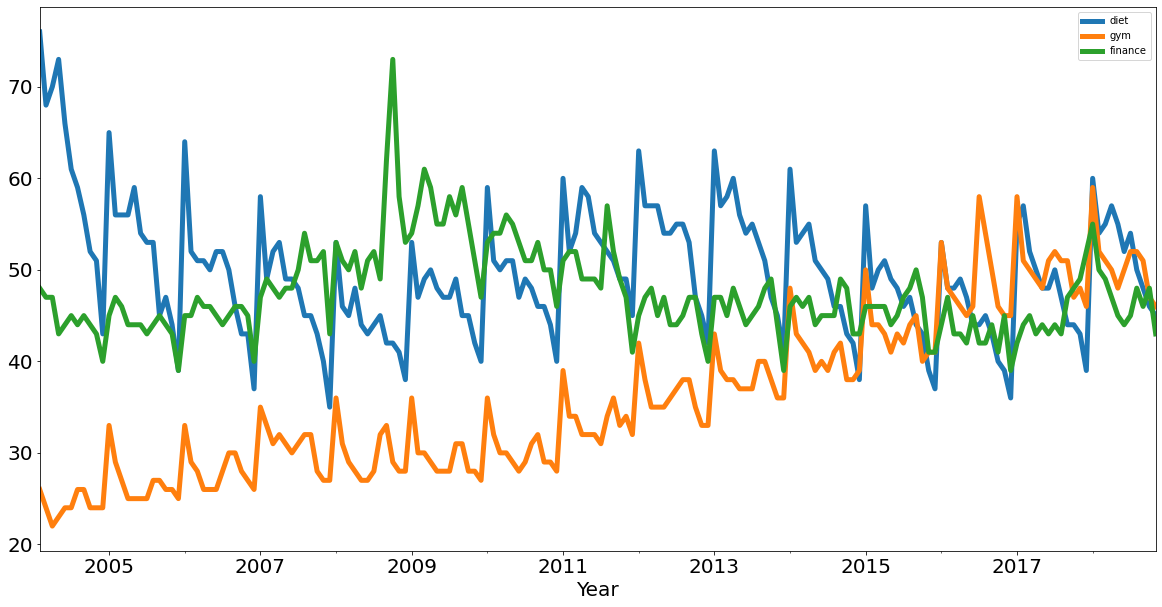

In [15]:
# 3개의 컬럼에 대한 시계열 곡선

df.plot(figsize = (20,10),linewidth = 5,fontsize = 20)
plt.xlabel('Year',fontsize = 20)

Text(0.5, 0, 'Year')

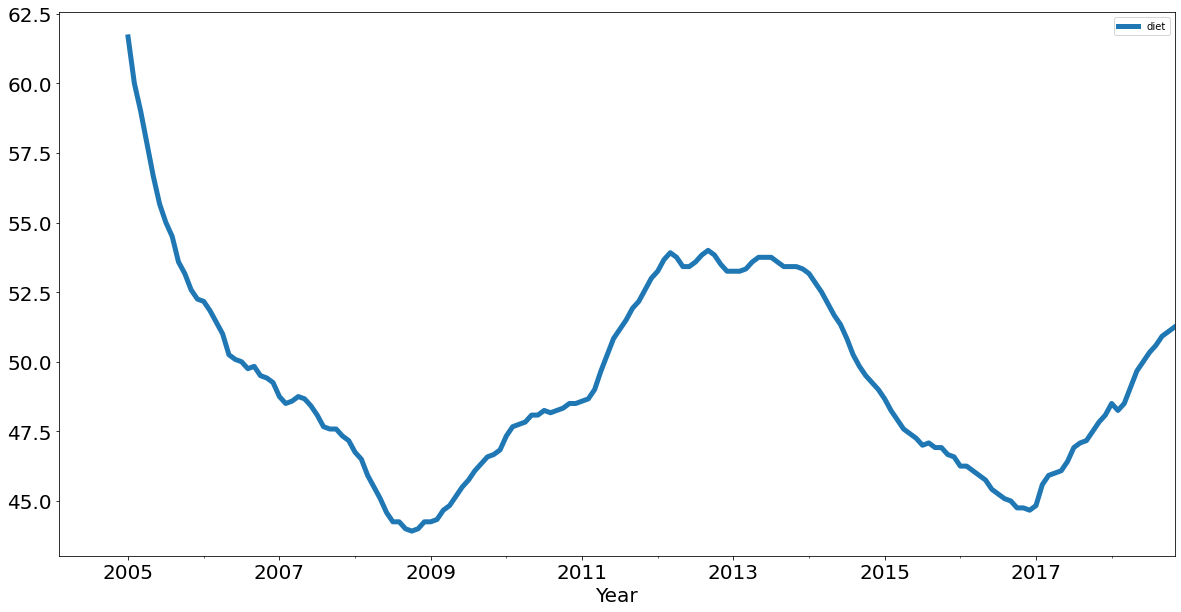

In [26]:
# 12 사이즈 이동평균

diet = df[['diet']]
diet.rolling(12).mean().plot(figsize = (20,10),linewidth = 5,fontsize = 20)
plt.xlabel('Year',fontsize = 20)

Text(0.5, 0, 'Year')

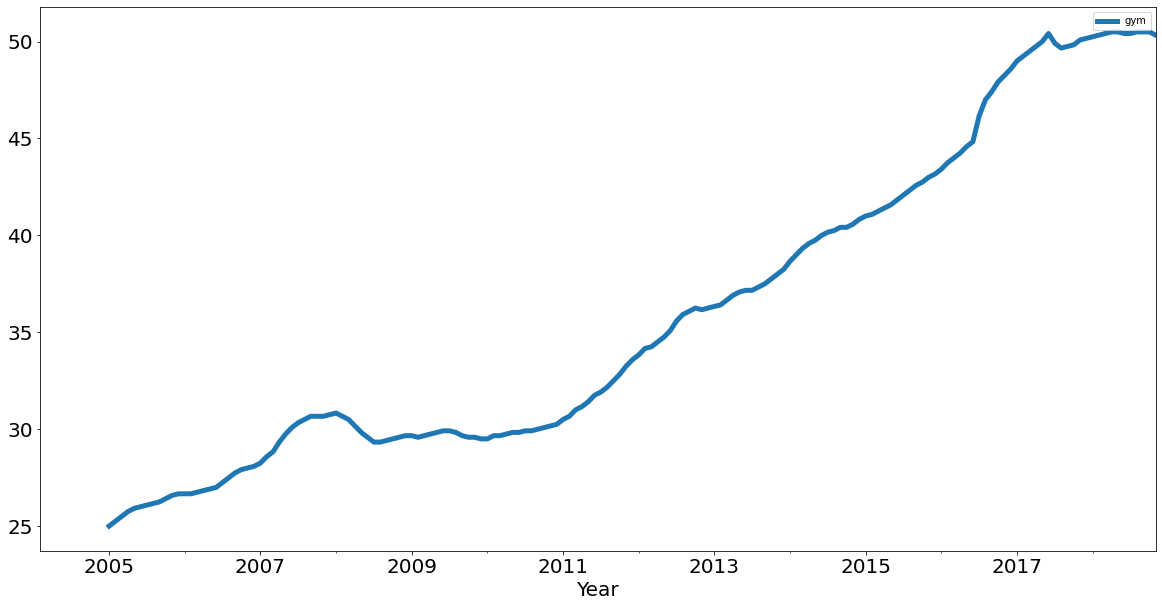

In [28]:
# 12 사이즈 이동평균

gym = df[['gym']]
gym.rolling(12).mean().plot(figsize = (20,10),linewidth = 5,fontsize = 20)
plt.xlabel('Year',fontsize = 20)

Text(0.5, 0, 'Year')

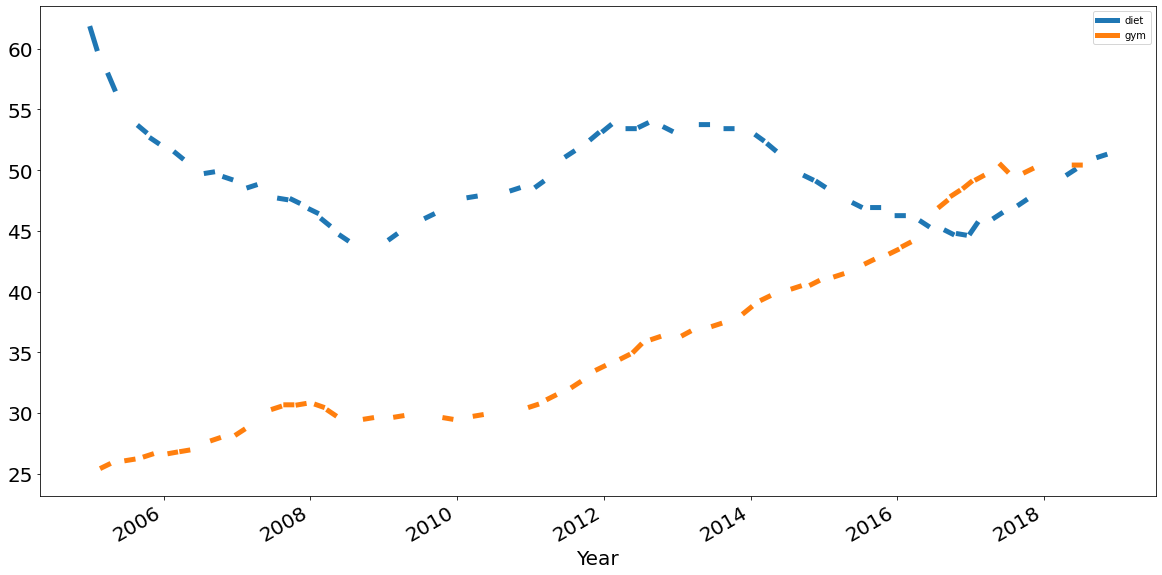

In [29]:
# 12 사이즈 이동평균
diet = pd.concat([diet.rolling(12).mean(),gym.rolling(12).mean()])
diet.plot(figsize = (20,10),linewidth = 5,fontsize = 20)
plt.xlabel('Year',fontsize = 20)

Text(0.5, 0, 'Year')

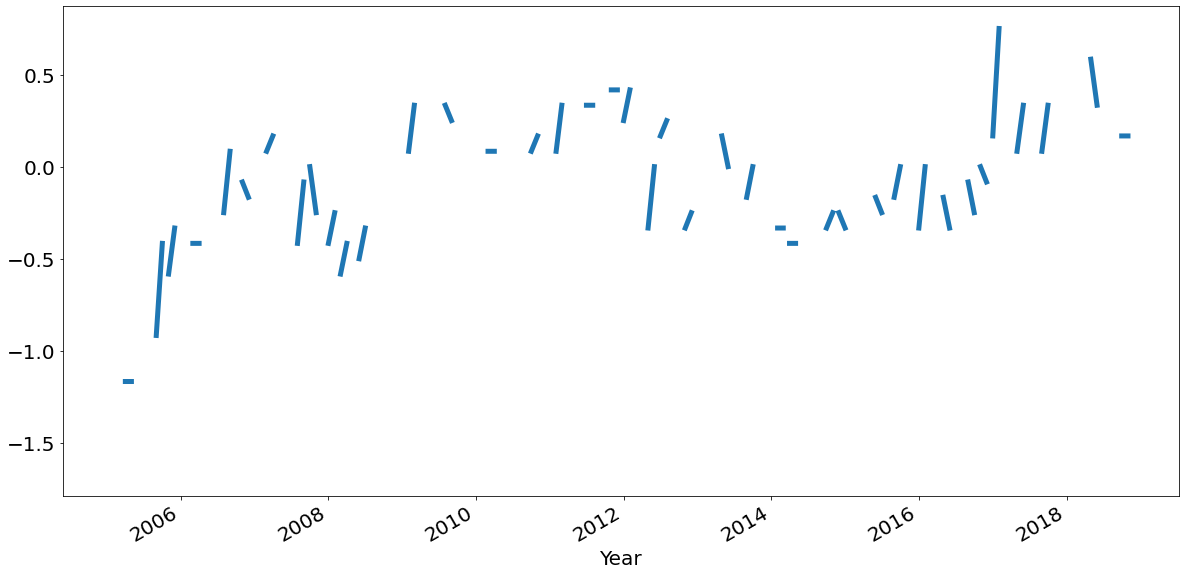

In [31]:
# 다이어트 곡선에 대한 차분(diff)그래프

diet.diff().plot(figsize =(20,10),linewidth = 5, fontsize = 20)
plt.xlabel('Year',fontsize = 20)

# 결과 해석
# 차분 결과, 비정상성 곡선 >> 정상성 뛴 곡선으로 변경 확인
# 평균, 분산이 일정해 지는 효과

In [33]:
# 컬럼 간 상관관계 행렬
df.corr()
# gym과 finance 역의 상관관계 확인 (-22%)

,diet,gym,finance
diet,1.000000,-0.039623,-0.041780
gym,-0.039623,1.000000,-0.229946
finance,-0.041780,-0.229946,1.000000


Text(0.5, 0, 'Year')

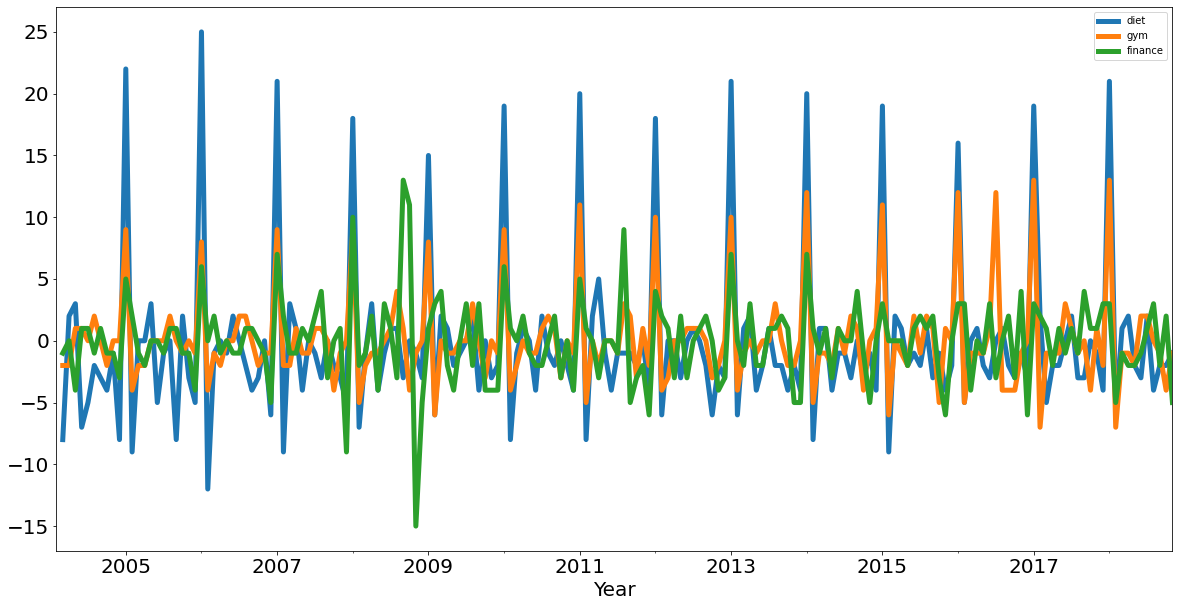

In [36]:
# 3개의 속성에 대한 차분 그래프

df.diff().plot(figsize =(20,10),linewidth = 5, fontsize = 20)
plt.xlabel('Year',fontsize = 20)
# 전반적으로 비슷한 수준을 보임

In [37]:
# 차분에 대한 상관관계 행렬

df.diff().corr()
# diet 변하면 gym도 쉽게 변함 민감도 분석

,diet,gym,finance
diet,1.000000,0.800682,0.397953
gym,0.800682,1.000000,0.342698
finance,0.397953,0.342698,1.000000
